In [2]:
import os
import subprocess
import re

import matplotlib.pyplot as plt

In [15]:
# Get the list of files in the current directory
files = os.listdir('./../embench/')

In [17]:
# Filter out 'run.ipynb' and 'dbt'
binaries = files

binaries

['nettle-aes',
 'qrduino',
 'nbody',
 'nettle-sha256',
 'tarfind',
 'edn',
 'picojpeg',
 'sglib-combined',
 'huffbench',
 'crc32',
 'matmult-int',
 'nsichneu',
 'statemate',
 'aha-mont64',
 'md5sum',
 'st',
 'ud',
 'primecount',
 'wikisort',
 'minver',
 'cubic',
 'slre']

In [ ]:
# Run 'dbt' with each binary as the first argument
for binary in binaries:
    subprocess.run(['./dbt', binary])

In [18]:
rail_color = '#3F6BB9'
rail_plus_color = '#7DB958'
dynamorio_color = '#996CAB'

{}


/tmp/ipykernel_3583102/1631560841.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(binaries, rotation=45, ha='right')


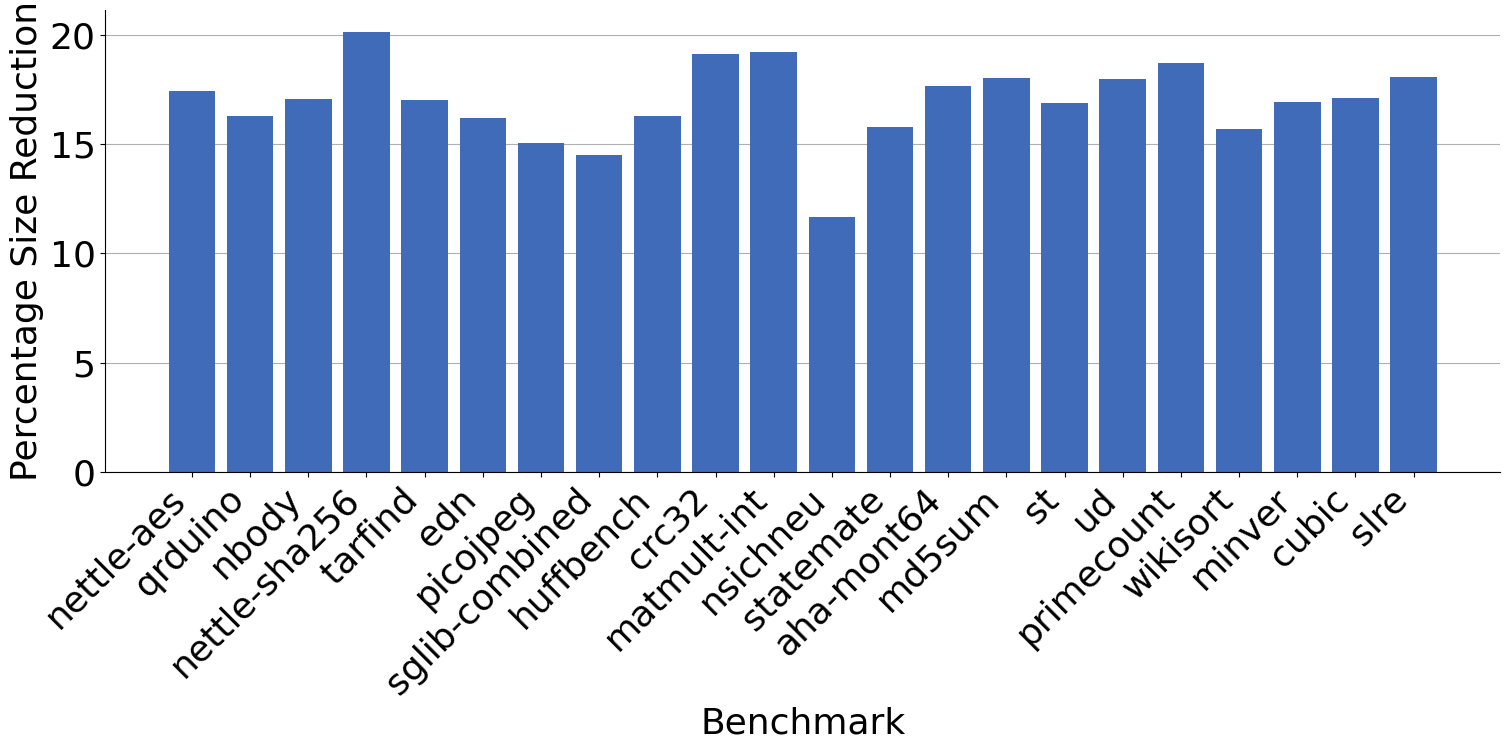

In [19]:
# Initialize dictionaries to store the percentage reduction and original size for each binary
percentage_reduction = {}
compressed_reduction = {}
original_size = {}

# Read the content of each file in the /out directory and extract the percentage reduction and original size values
for binary in binaries:
    with open(f'./out/dbt_{binary}_logs', 'r') as file:
        content = file.read()
        reduction_match = re.search(r'Percentage reduction: ([\d.]+)', content)
        size_match = re.search(r'Original Size: ([0-9a-fA-F]+)', content)
        if size_match:
            original_size[binary] = int(size_match.group(1), 16)
        if reduction_match:
            percentage_reduction[binary] = float(reduction_match.group(1))
        if size_match:
            # print("SIZE")
            original_size[binary] = int(size_match.group(1), 16)
    
print(compressed_reduction)
    

# Plotting
fig, ax = plt.subplots(figsize=(18, 6))

# Plot the percentage reduction values as a barplot
plt.rcParams.update({'font.size': 26})
ax.bar(percentage_reduction.keys(), percentage_reduction.values(), color=rail_color, zorder=2)
ax.set_xlabel('Benchmark')
ax.set_ylabel('Percentage Size Reduction')
ax.grid(axis='y', zorder=0)
ax.spines[['right', 'top']].set_visible(False)
ax.set_xticklabels(binaries, rotation=45, ha='right')

# Save the plot as a PDF file
plt.savefig('percentage_reduction_plot.pdf', format='pdf', bbox_inches="tight")
plt.show()